# What is an Artificial Neural Network (ANN)?
*reference idea https://www.seas.upenn.edu/~cis519/fall2017/lectures/11_NeuralNets.pdf*<br>
<br>
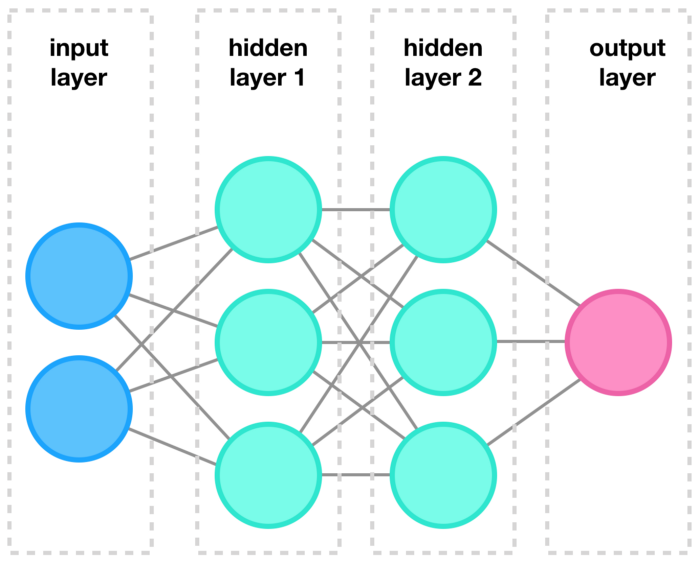!<br>
*image from https://towardsdatascience.com/a-neural-network-from-scratch-c09fd2dea45d*

### Architecture:
> - 2 input nodes (number of features of the model)
> - 2 hidden layers with 3 nodes each (level of complexity of the model)
> - 1 output node (number of target variables of the model)

*Each node can be seen like this:*<br>
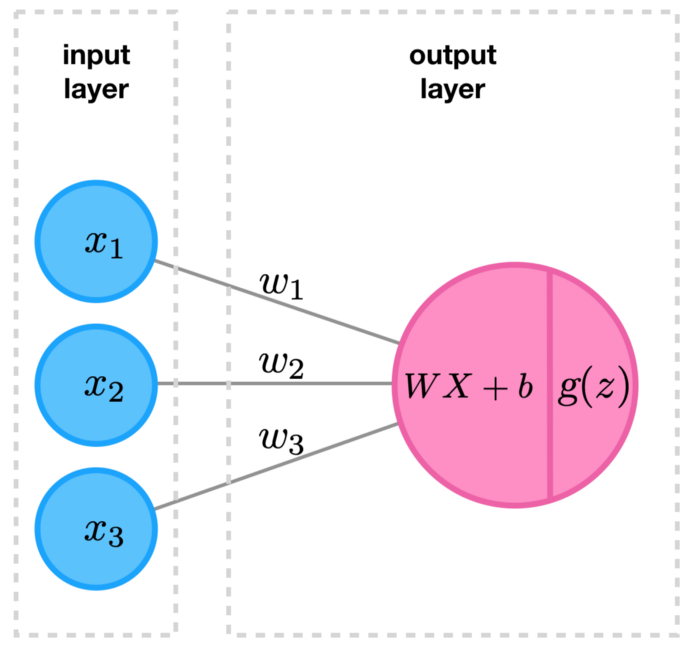!<br>
*image from https://towardsdatascience.com/a-neural-network-from-scratch-c09fd2dea45d*<br>
where:<br>
> - $X$ is the vector of examples
> - $W$ is the vector of weights
> - $b$ is the bias
> - $g(z)$ is the activation function, usually we use:
>> - the relu function $relu(z)$ for hidden layers
>> - the sigmoid function $\sigma(z)$ for output layer

*ANN can be seen like this:* <br>
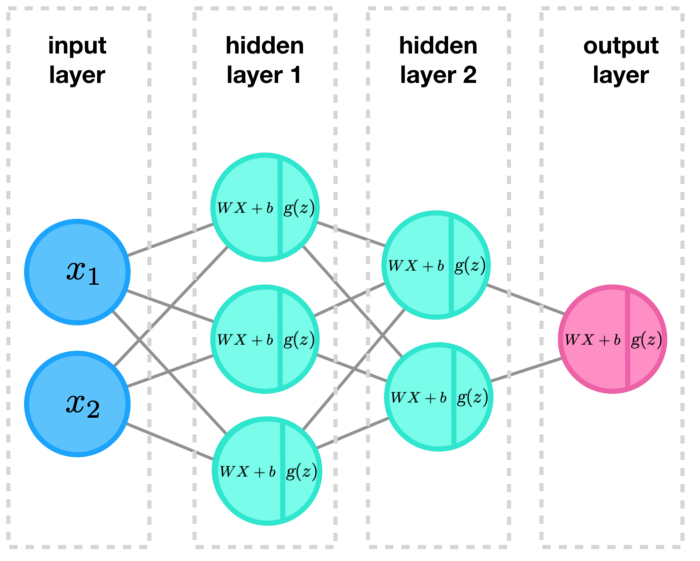!<br>
*image from https://towardsdatascience.com/a-neural-network-from-scratch-c09fd2dea45d*

### How an ANN is trained?
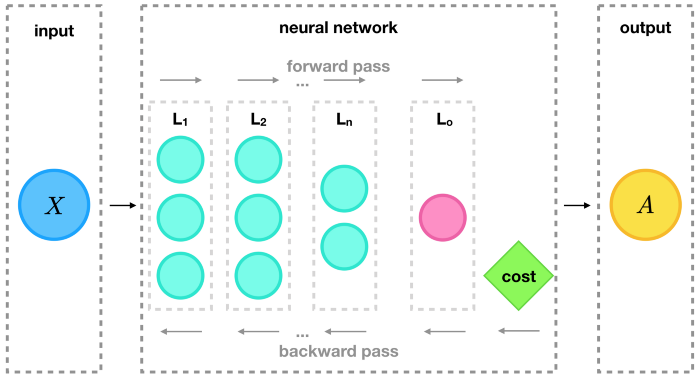! <br>
*image from https://towardsdatascience.com/a-neural-network-from-scratch-c09fd2dea45d*<br>
> - **Initialization:** all weights $W$ and biases b are initialized at random
> - **Forward Propagation:** the example $x_i$ (or a batch of examples) are propagated trought the output
> - **Cost calculation:** Cost function $J$ is calculated (some error function)
> - **Backward Propagation:** Cost $J$ is derived with respect to all weights and biases to find the relative corrections *(gradient descent)*

#### Some Math
> - *sigmoid function*<br>
\begin{equation}
\sigma(z) = \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
\end{equation}
<br>
> - *ReLu function*<br>
\begin{equation}
R(x) = max(0,x)
\end{equation}
<br>

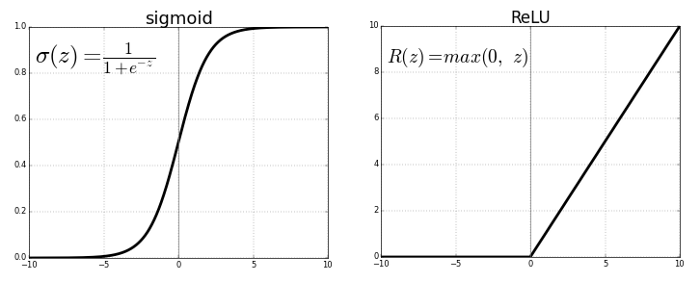!<br>
*image from* https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6 <br>

> - *cost function*, binary cross entropy<br>
\begin{equation}
J(x_i) = -\frac{1}{m}\sum_{i=1}^{m}(y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i))\\
m = \text{number of training examples}
\end{equation}


#### Notations (for the Back Propagation phase)
> - *weights and bias correction* for layer **L**<br>
\begin{equation}
\partial W^{L} = \frac{\partial J}{\partial W^L}\\
\partial b^{L} = \frac{\partial J}{\partial b^L}
\end{equation}<br>

## Formulas
*example for 2 hidden layers and 1 output layer*
> - #### Note
>> - $A^2 = \hat{Y}$
>> - $m$ = number of training examples

> - #### Initialization
>> *first layer*
>> - $W^1 = \sim \mathcal{N}(0,1) \cdot 0.05$
>> - $b^1 = 0$
>> *second layer*
>> - $W^2 = \sim \mathcal{N}(0,1) \cdot 0.05$
>> - $b^2 = 0$
>> *output layer*
>> - $W^o = \sim \mathcal{N}(0,1) \cdot 0.01$
>> - $b^o = 0$

> - #### Forward Propagation 
>> *first layer*
>> - $Z^1 = W^1 X + b^1$ -- first layer nodes
>> - $A^1 = R(Z^1)$ -- first layer activation functions
>> *second layer*
>> - $Z^2 = W^2 A^1 + b^2$ -- second layer nodes
>> - $A^2 = R(Z^2)$ -- second layer activation functions
>> *output layer*
>> - $Z^o = W^o A^2 + b^o$ -- output layer nodes
>> - $A^o = \sigma(Z^o)$ -- output layer activation functions

> - #### Back Propagation

>> *output layer*
>> - $\partial Z^o = A^o - Y$
>> - $\partial W^o = \frac{1}{m} \cdot \partial Z^o \cdot A'^{2}$
>> - $\partial b^o = \frac{1}{m} \cdot \sum_{i=1}^{n}\partial Z_i^o$
>> *second layer*
>> - $\partial Z^2 = W'^o \cdot \partial Z^o * \mathcal{D}[\sigma(Z^o)]$
>> - $\partial W^2 = \frac{1}{m} \cdot \partial Z^2 \cdot A'^{1}$
>> - $\partial b^2 = \frac{1}{m} \cdot \sum_{i=1}^{n}\partial Z_i^2$
>> *first layer*
>> - $\partial Z^1 = W'^o \cdot \partial Z^o * \mathcal{D}[\sigma(Z^1)]$
>> - $\partial W^1 = \frac{1}{m} \cdot \partial Z^1 \cdot X'$
>> - $\partial b^1 = \frac{1}{m} \cdot \sum_{i=1}^{n}\partial Z_i^1$

#### Gradient Descent
*reference idea* http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/<br>
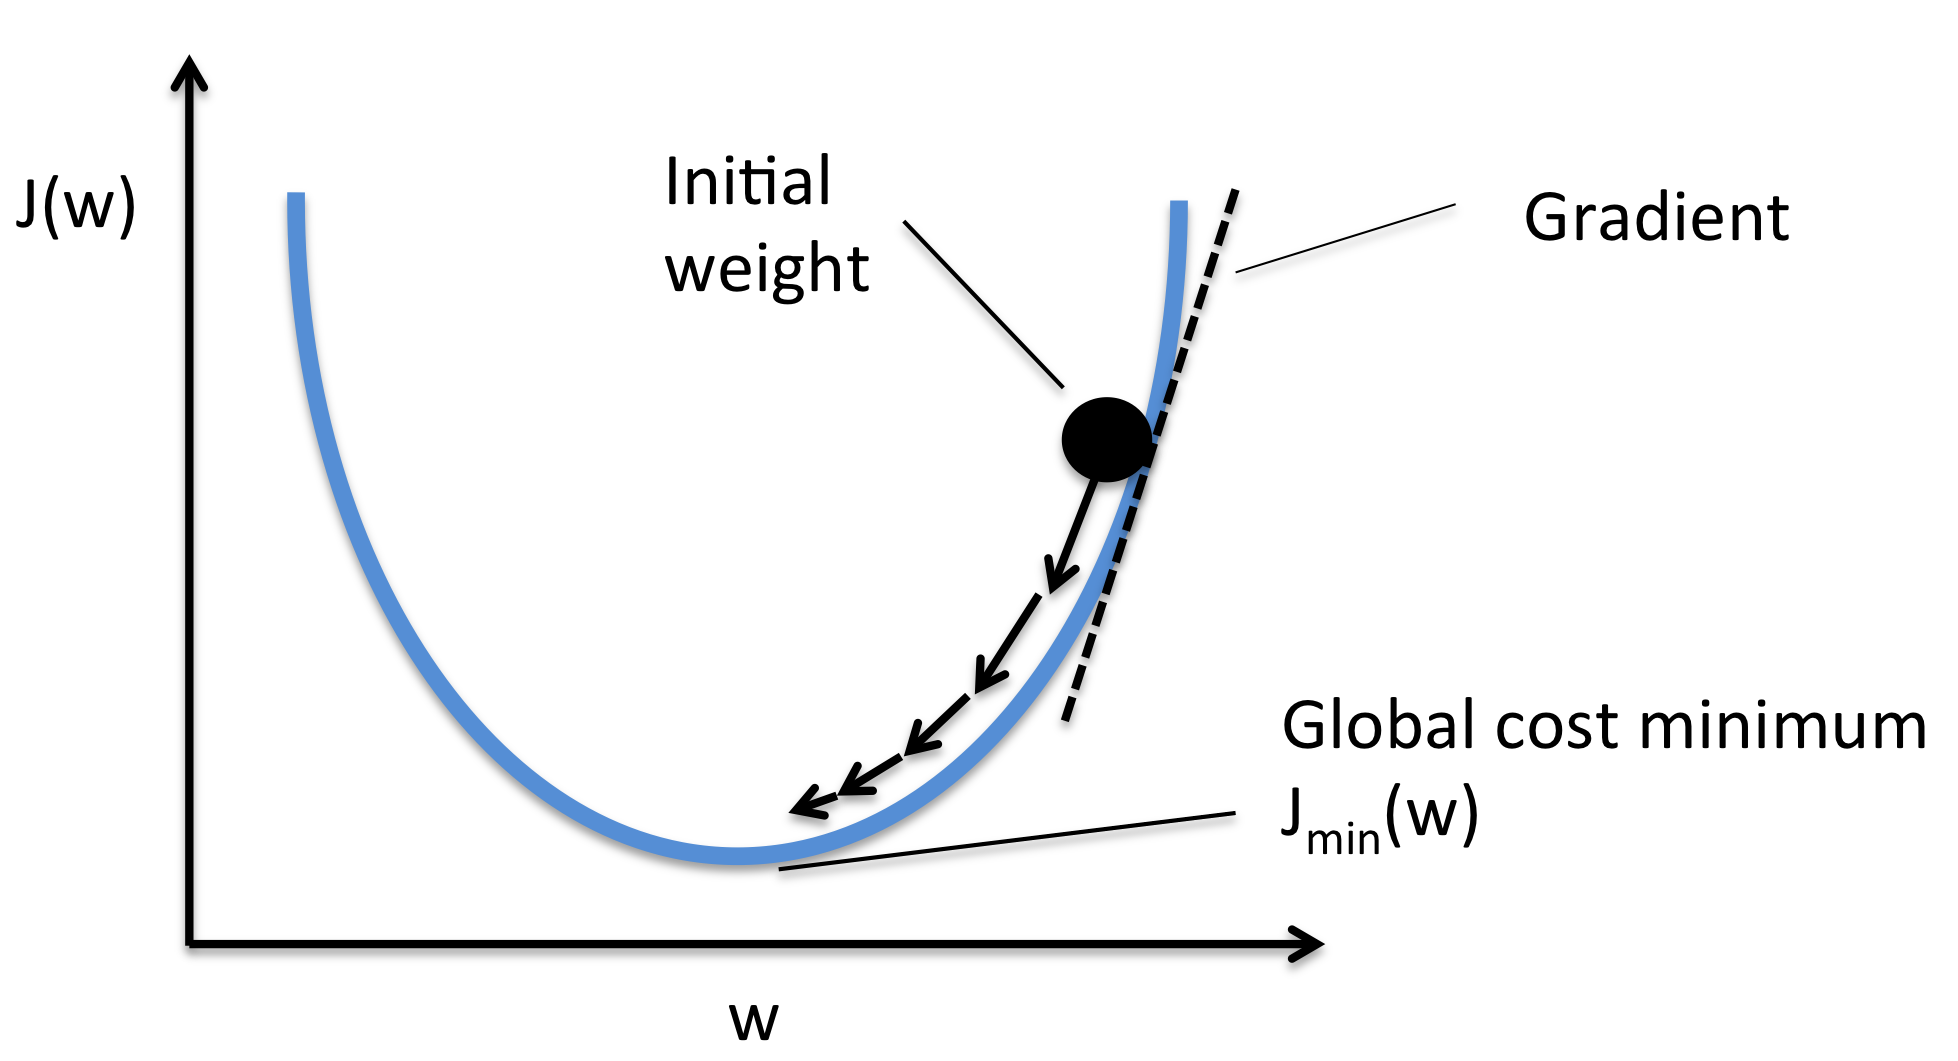<br>
*image from* http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/ <br>

#### Weights and bias update Formulas
> - #### Note
>> - these updates are done for every learning epoch
>> - $\alpha$ is the learning rate
>> *first layer*
>> - $W^1 = W^1 - \alpha \cdot \partial W^1$
>> - $b^1 = b^1 - \alpha \cdot \partial b^1$
>> *second layer*
>> - $W^2 = W^2 - \alpha \cdot \partial W^2$
>> - $b^2 = b^2 - \alpha \cdot \partial b^2$
>> *output layer*
>> - $W^o = W^o - \alpha \cdot \partial W^o$
>> - $b^o = b^o - \alpha \cdot \partial b^o$

#### Let's cut the chatter (BANDO ALLE CIANCE!!!)

In [1]:
#libraries
import numpy as np
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1926)

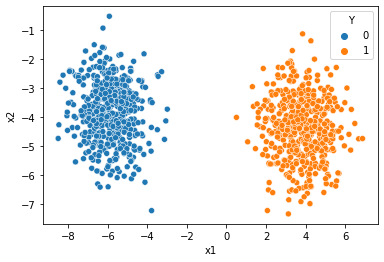

In [2]:
#create a classification dataset
X, Y = make_blobs(n_samples=1000, n_features=2, centers=2)
df = pd.DataFrame()
df['x1'], df['x2'], df['Y'] = X[:,0], X[:,1], Y
sns.scatterplot(data=df, x='x1',y='x2', hue='Y');

In [3]:
#matrices shapes
m = X.shape[0] #number of examples
nx = X.shape[1] #number of features
n1 = 5 #hidden layer 1 nodes
n2 = 2 #hidden layer 2 nodes
no = 1 #output layer nodes

In [4]:
#initialization
alpha = 0.1
epochs = 10000
W1 = np.random.randn(n1,nx)*0.05
b1 = np.zeros((n1,m))
W2 = np.random.randn(n2,n1)*0.05
b2 = np.zeros((n2,m))
Wo = np.random.randn(no,n2)*0.01
bo = np.zeros((no,m))

In [5]:
def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return np.greater(x, 0).astype(int)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [6]:
#forward propagation
def execute_forward_propagation(W1, b1, W2, b2, Wo, bo):
    Z1 = np.dot(W1,X.T) + b1
    A1 = relu(Z1)

    Z2 = np.dot(W2,A1) + b2
    A2 = relu(Z2)

    Zo = np.dot(Wo,A2) + bo
    Ao = sigmoid(Zo)
    return A1, Z1, A2, Z2, Ao, Zo

In [7]:
#back propagation
def execute_back_propagation(A1, Z1, A2, Z2, Ao, Zo, Y):
    dZo = Ao - Y.reshape(-1,1).T
    dWo = 1/m * np.dot(dZo,A2.T)
    dbo = 1/m * np.sum(dZo, axis=1, keepdims=True)
    dA2 = np.dot(Wo.T,dZo)

    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T,dZ2)

    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = 1/m * np.dot(dZ1,X)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2, dWo, dbo

In [8]:
#Weights and bias update
def update_weights_and_biases(W1, dW1, b1, db1, W2, dW2, b2, db2, Wo, dWo, bo, dbo):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    Wo = Wo - alpha * dWo
    bo = bo - alpha * dbo
    return W1, b1, W2, b2, Wo, bo

In [9]:
def calculate_loss(Y,Ao):
    eps=1e-15
    Y =Y.reshape(-1,1).T
    Yhat = Ao
    loss = Y*np.log(Yhat+eps) + (1-Y)*np.log(1-Yhat+eps)
    J = -1/m*np.sum(loss, axis=1)
    return J[0] #return the value and not the array of 1 value

In [10]:
#training procedure
J = []
for epoch in range(epochs):
    A1, Z1, A2, Z2, Ao, Zo = execute_forward_propagation(W1, b1, W2, b2, Wo, bo)
    J.append(calculate_loss(Y,Ao))
    dW1, db1, dW2, db2, dWo, dbo = execute_back_propagation(A1, Z1, A2, Z2, Ao, Zo, Y)
    W1, b1, W2, b2, Wo, bo = update_weights_and_biases(W1, dW1, b1, db1, W2, dW2, b2, db2, Wo, dWo, bo, dbo)

In [11]:
#prediction
_, _, _, _, Yhat, _ = execute_forward_propagation(W1, b1, W2, b2, Wo, bo)
Yhat = Yhat.ravel().round()

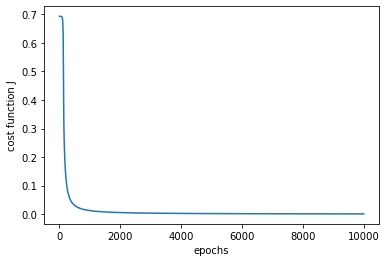

In [25]:
ax = plt.plot(J)
plt.xlabel('epochs')
plt.ylabel('cost function J');

In [26]:
from sklearn.metrics import accuracy_score
print('final accuracy --> ', accuracy_score(Y,Yhat))

final accuracy -->  1.0
